In [ ]:
import io
import pandas as pd
import numpy as np
from google.colab import files
uploaded = files.upload()
train_data = pd.read_csv(io.BytesIO(uploaded['train_knn.txt'] ), 
              sep="," ,  header = None, dtype = 'Int64')

Saving train_knn.txt to train_knn.txt


In [ ]:
uploaded = files.upload()
test_data = pd.read_csv(io.BytesIO(uploaded['test_knn.txt'] ), 
              sep="," ,  header = None, dtype = 'Int64')



Saving test_knn.txt to test_knn.txt


In [ ]:
train_class_1=[]
train_class_2=[]
#SEPARATING TRAIN DATA INTO 2 CLASSES
for i in range(len(train_data)):
  if train_data[2][i]==1:
    train_class_1.append([train_data[0][i],train_data[1][i]])
    
  else:
    train_class_2.append([train_data[0][i],train_data[1][i]])

print('class 1:',train_class_1)
print('class 2:',train_class_2)
train_class_1=np.array(train_class_1)
train_class_2=np.array(train_class_2)


class 1: [[7, 7], [7, 4], [6, 4], [7, 5], [7, 6], [6, 7], [6, 6]]
class 2: [[3, 4], [2, 3], [3, 2], [4, 3], [3, 3], [4, 4], [1, 4]]


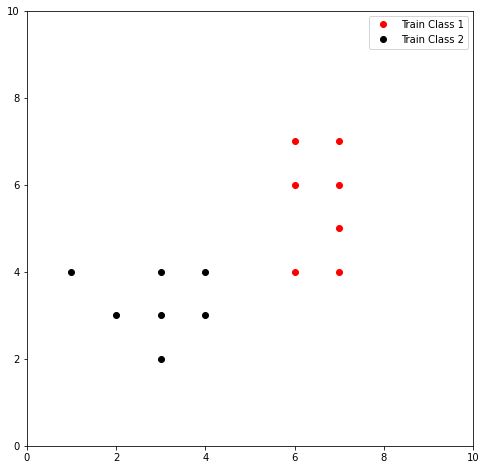

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,8))
#PLOTTING TRAIN DATA
plt.plot(train_class_1[:,0],train_class_1[:,1],'ro',label='Train Class 1')
plt.plot(train_class_2[:,0],train_class_2[:,1],'ko',label='Train Class 2')
plt.legend()
plt.xlim([0,10])
plt.ylim([0,10])  
plt.show()

In [ ]:
k=int(input("Enter k:"))

# k=3
test_class_1=[]
test_class_2=[]
f = open("prediction.txt", "a")


for i in range(len(test_data)):
  lst=[]
  f.write("Test point:"+str(test_data[0][i])+","+str(test_data[1][i])+"\n")
  for j in range(len(train_data)):
    val=((train_data[0][j]-test_data[0][i])*(train_data[0][j]-test_data[0][i]))+((train_data[1][j]-test_data[1][i])*(train_data[1][j]-test_data[1][i]))
    lst.append([j,val])
 
  lst=np.array(lst)
  lst = lst[lst[:,1].argsort()] 
  top_k=lst[:k]

  count_1,count_2=0,0
  n=1
  for m in top_k[:,0]:
    f.write("Distance "+str(n)+": "+str(top_k[n-1][1])+"\tClass: "+str(train_data[2][m])+"\n")
    n=n+1
    if train_data[2][m]==1:
      count_1=count_1+1
    else:
      count_2=count_2+1
  if count_1>count_2:
    test_class_1.append([test_data[0][i],test_data[1][i]])
    f.write("Predicted Class: 1\n")
  else:
    test_class_2.append([test_data[0][i],test_data[1][i]])
    f.write("Predicted Class: 2\n")

test_class_1=np.array(test_class_1)
test_class_2=np.array(test_class_2)
f.close()

In [ ]:
f = open("prediction.txt", "r")
print(f.read())

Test point:3,7
Distance 1: 9	Class: 1
Distance 2: 9	Class: 2
Distance 3: 10	Class: 1
Predicted Class: 1
Test point:7,7
Distance 1: 0	Class: 1
Distance 2: 1	Class: 1
Distance 3: 1	Class: 1
Predicted Class: 1
Test point:4,3
Distance 1: 0	Class: 2
Distance 2: 1	Class: 2
Distance 3: 1	Class: 2
Predicted Class: 2
Test point:2,8
Distance 1: 17	Class: 1
Distance 2: 17	Class: 2
Distance 3: 17	Class: 2
Predicted Class: 2
Test point:3,5
Distance 1: 1	Class: 2
Distance 2: 2	Class: 2
Distance 3: 4	Class: 2
Predicted Class: 2
Test point:1,2
Distance 1: 2	Class: 2
Distance 2: 4	Class: 2
Distance 3: 4	Class: 2
Predicted Class: 2
Test point:4,8
Distance 1: 5	Class: 1
Distance 2: 8	Class: 1
Distance 3: 10	Class: 1
Predicted Class: 1
Test point:8,3
Distance 1: 2	Class: 1
Distance 2: 5	Class: 1
Distance 3: 5	Class: 1
Predicted Class: 1
Test point:8,4
Distance 1: 1	Class: 1
Distance 2: 2	Class: 1
Distance 3: 4	Class: 1
Predicted Class: 1



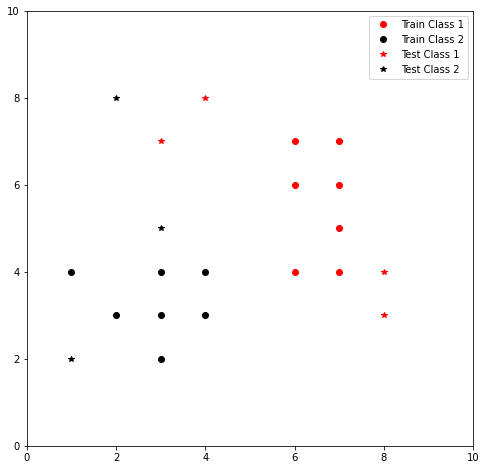

In [ ]:
plt.figure(figsize=(8,8))
#PLOTTING TEST DATA
plt.plot(train_class_1[:,0],train_class_1[:,1],'ro',label='Train Class 1')
plt.plot(train_class_2[:,0],train_class_2[:,1],'ko',label='Train Class 2')
plt.plot(test_class_1[:,0],test_class_1[:,1],'r*',label='Test Class 1')
plt.plot(test_class_2[:,0],test_class_2[:,1],'k*',label='Test Class 2')
plt.legend()
plt.xlim([0,10])
plt.ylim([0,10])  
plt.show()